In [ ]:
import pandas as pd
data = {
    'created_at': ['2023-10-01', '2023-10-01', '2023-10-02', '2023-10-03'],
    'text': [
        'I love this product! It’s amazing and works perfectly.',
        'Terrible experience. Customer service was unhelpful.',
        'The product is okay, but could use improvements.',
        'Absolutely fantastic! Highly recommend it.'
    ]
}
df = pd.DataFrame(data)
df['created_at'] = pd.to_datetime(df['created_at'])


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the necessary NLTK data packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab data package

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment'].apply(lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral'))
print(df[['created_at', 'text', 'sentiment_label']])

  created_at                                               text  \
0 2023-10-01  I love this product! It’s amazing and works pe...   
1 2023-10-01  Terrible experience. Customer service was unhe...   
2 2023-10-02   The product is okay, but could use improvements.   
3 2023-10-03         Absolutely fantastic! Highly recommend it.   

  sentiment_label  
0        Positive  
1        Negative  
2        Positive  
3        Positive  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df,palette='inferno')
plt.title('Sentiment Distribution')
plt.show()
df['date'] = df['created_at'].dt.date
sentiment_trend = df.groupby(['date', 'sentiment_label']).size().unstack().fillna(0)
sentiment_trend.plot(kind='line', figsize=(10, 6), marker='o',color='green')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

NameError: name 'df' is not defined

<Figure size 800x500 with 0 Axes>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-3-04ceec760bbe>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='inferno') # Now 'df' is defined


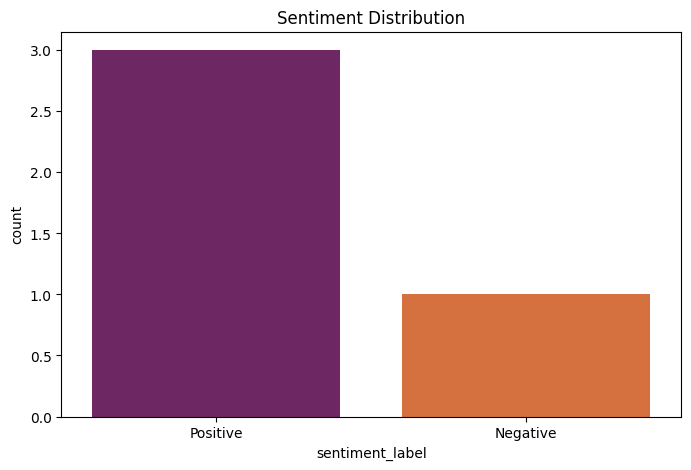

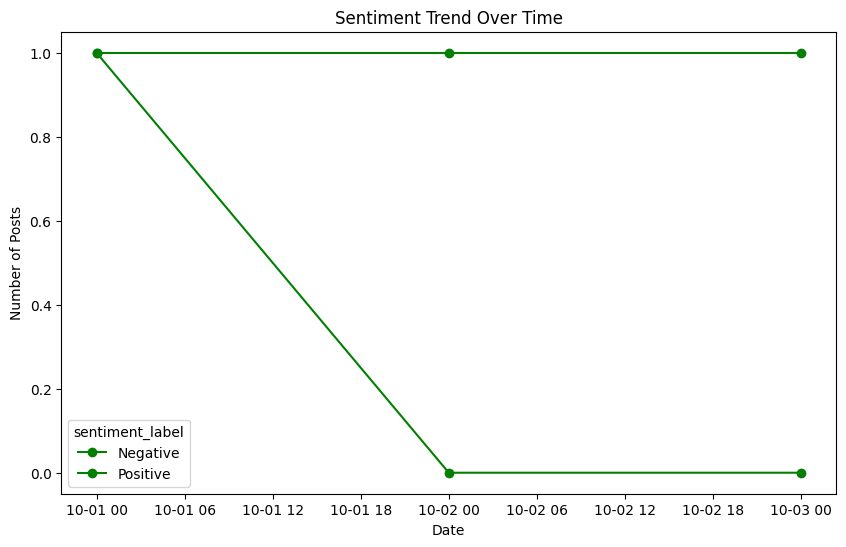

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas

# Assuming your data processing code is in separate cells or scripts,
# you need to re-create or reload the DataFrame 'df' in this cell as well.

# ... (Your code to create/load the DataFrame 'df' as in your previous cells) ...
data = {
    'created_at': ['2023-10-01', '2023-10-01', '2023-10-02', '2023-10-03'],
    'text': [
        'I love this product! It’s amazing and works perfectly.',
        'Terrible experience. Customer service was unhelpful.',
        'The product is okay, but could use improvements.',
        'Absolutely fantastic! Highly recommend it.'
    ]
}
df = pd.DataFrame(data)
df['created_at'] = pd.to_datetime(df['created_at'])
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the necessary NLTK data packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab data package

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(preprocess_text)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment'].apply(lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral'))


plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df, palette='inferno') # Now 'df' is defined
plt.title('Sentiment Distribution')
plt.show()

df['date'] = df['created_at'].dt.date
sentiment_trend = df.groupby(['date', 'sentiment_label']).size().unstack().fillna(0)
sentiment_trend.plot(kind='line', figsize=(10, 6), marker='o', color='green')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()